# Phishing Mail Detection With Machine Learning Models

**Author:** Alperen Karadağ   **Date:** 27.08.2024

Ever since the advent of the Internet, one of the most common and effective tools of criminal activity online has been **phishing mails**. Phishing emails pose a serious threat to **individuals** and even **large-scale organizations** all around the world, as they are designed to deceive recipients into revealing sensitive information or engaging in harmful activities. Detecting and neutralizing the danger caused by these malicious emails is essential for maintaining **personal** and **financial security**. But the use of primitive methods and common sense digital literacy have started to be insufficient in this regard, as phishing techniques are becoming more sophisticated in their execution with each passing day. To counter this, **machine learning models** have emerged as a powerful tool for **cybersecurity** and **phishing mail detection**.

The predictive modeling problem in this **supervised learning** project involves a dataset consisting of **thousands of emails**, which were labeled as **`Safe Email`** or **`Phishing Email`**, as part of the **`Email Type`** target variable. This **binary classification** problem will serve as the basis for evaluating the performance of each machine learning algorithm. By testing different algorithms, we aim to identify the **best suited model** for distinguishing between **safe** and **phishing** emails. 

We will start by **loading** and **readying** the dataset, followed by **training** several machine learning models. We will then assess their accuracy and other performance metrics using techniques such as **confusion matrices**, **classification reports**, and **cross-validation**. The goal is to determine the algorithm with the highest **accuracy** in a real-world application, providing insights into the most effective approach for detecting phishing emails.

One **footnote** is that the dataset classifies **spam mail** as phishing mail as well, when in reality spam mail is **not always** sent with malicious intent. The basic **premise** of binary classification is what's important for this example, so the exact contents of the sample text will be **ignored**.


The source of the dataset can be found on [this](https://www.kaggle.com/dsv/6090437) page on Kaggle.

## Importing the Necessary Modules

In [5]:
import pandas as pd  # Import pandas for data manipulation and analysis
import numpy as np  # Import NumPy for numerical operations and array handling
import matplotlib.pyplot as plt # Import Matplotlib for creating static visualizations and plots.
import seaborn as sns # Import Seaborn for statistical data visualization, built on top of Matplotlib.

## Displaying the Dataset

The **`DataFrame`** object provided by the **Pandas** module will be used to examine and process the student performance data. The **`read_csv()`** method is especially useful to carry this out as it returns a DataFrame object with rows and columns corresponding to the rows and columns in the file.

In [8]:
df = pd.read_csv('Int1/Phishing_Email.csv')

In [9]:
df

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...,...
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18646,18647,request submitted : access request for anita ....,Safe Email
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,18649,press clippings - letter on californian utilit...,Safe Email


To see the full text of each sample email, you can use the code below and call the **`df`** dataframe again.

In [11]:
#pd.set_option('display.max_colwidth', None)

In [12]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


## Preparing the Dataset for Training

The primary features in the dataset are **`Email Text`**, which contain the body of text of each email sample, and **`Email Type`**, which stores the label given to each sample. **`Unnamed: 0`** on the other hand, serves as an index qualifier for individual samples. This has become redundant as we've put the dataset in a dataframe object. So we will drop this column prior to the training phase.

In [15]:
df = df.drop('Unnamed: 0', axis=1)

In [16]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


Getting to know the various features of a dataset is important for data analysis. This why it is always prudent to employ certain Pandas properties that is presenting this information in a project. We will check out a few of these tools and find out a **critical detail** that we **especially** need to be aware of.

The first of these properties is the **shape** attribute of objects, which returns a tuple representing the number of **rows (samples)** in the **first** element, and the number of **columns (features)** in the **second** element.

In [18]:
df.shape

(18650, 2)

Another useful practice is using the **`info()`** method to get a summary of information regarding the **number of entries (rows)**, **index range**, **column names**, **non-null count**, **data types** and **memory usage** of the **`DataFrame`**.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  18634 non-null  object
 1   Email Type  18650 non-null  object
dtypes: object(2)
memory usage: 291.5+ KB


What we've realized from this summary is that **`Email Text`** feature includes a total of **16 null (empty)** values, a situation that will lead to errors, how minute the amount be, in the training phase if we don't do something about it.

One final property we'll check out is the expression down **below**:

In [22]:
df.isnull().mean()*100

Email Text    0.085791
Email Type    0.000000
dtype: float64

Here,  **`isnull()`** first checks if each cell in **`df`** is missing to return **`True`** if it does  (i.e., **`NaN`**), or **`False`** otherwise, then the **`mean()`** method calculates the mean of **`True`** values (which are treated as **1**) and **`False`** values (which are treated as **0**). This gives the proportion of missing values for each column. At then end, the proportion is **multiplied by 100** to convert it to a **percentage**, resulting in a **`Series`** representing the percentage of missing values for the corresponding column in the dataframe.

We get to see an alternate method to observe the presence of **`null`** values this way, approximately **0.086%** of the values in the **`Email Text`** column are **`null`**. Again, however small the percentage may be, null values must be taken care of.

The easiset way to get rid of all rows with missing values is the **`dropna()`** method, which exactly delivers the desired outcome. The only thing to be careful about it is to specify its **`inplace`** parameter as **`True`**, otherwise the method will not modify the **`df`** dataframe.

In [24]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True) # This is so the indexes are in ascending order. (0, 1, 2, ...)
df

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...
18629,date a lonely housewife always wanted to date ...,Phishing Email
18630,request submitted : access request for anita ....,Safe Email
18631,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18632,press clippings - letter on californian utilit...,Safe Email


We can see that the empty-valued have been **deducted** from the **total number** of rows, meaning that we've taken care of the issue, but we will test for null values **one more time** after initializing the train and test variables just be completely sure.

What we need to do know is convert both our features  into integer values. Many machine learning algorithms require numerical input. Converting categorical variables to integers allows algorithms to process them. Also, integer values often use less memory and computational resources compared to strings.

We'll take care of the **`Email Type`** first and examine **2** different methods, **dictionary mapping** and **label encoding**, that could be used to carry this out.

Then, we will put something known as **vectorization**  to practice in order to encode all words contained in the **`Email Text`** samples with integer values.  

## Dictionary Mapping Method

**Dictionary Mapping** refers to the process of associating **each unique value** in a dataset with a **specific identifier or representation**, typically using a dictionary. It is commonly used to convert **categorical data** into **numerical data** or to map data values to more meaningful representations. The advantage of this approach is that each category can be assigned to a desired integer value, which is not the case with the other approach.

We will set **safe emails** as type **1** and **phishing emails** as type **0**.

This is the method we'll use for our main **`df`** dataframe, but a copy of the dataframe will be created to show the other approach as well.

In [28]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [29]:
df_a = df.copy() # Create an example DataFrame for the second approach
mapping_dict = {  # Define a mapping dictionary
    'Phishing Email': 0,
    'Safe Email': 1
}
df['Email Type'] = df['Email Type'].map(mapping_dict) # Apply the mapping
df.head() # Display the DataFrame

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,the other side of * galicismos * * galicismo *...,1
2,re : equistar deal tickets are you still avail...,1
3,\nHello I am your hot lil horny toy.\n I am...,0
4,software at incredibly low prices ( 86 % lower...,0


## Label Encoding Method

**Label Encoding** is a technique used to convert categorical labels into numerical form. Each unique category is assigned an integer value. This is often used in machine learning to convert **categorical variables** into into a **numerical format** for use in machine learning algorithms. Each unique category in the data is assigned a unique integer label that **cannot** be predetermined, which is a **drawback**, especially in **multinomial classification problems** with many categories that can be difficult to distinguish .

In [32]:
df_a.head() # Initial state of the dataframe

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
df_a['Email Type'] = label_encoder.fit_transform(df_a['Email Type'])
df_a.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,the other side of * galicismos * * galicismo *...,1
2,re : equistar deal tickets are you still avail...,1
3,\nHello I am your hot lil horny toy.\n I am...,0
4,software at incredibly low prices ( 86 % lower...,0


The same outcome is achieved in the end, with **1** representing safe emails and **0** representing phising emails.

## Display the Email Type Distribution on a Histogram

The **Matplotlib** module comes in handy for plotting various types of graphs for data analysis. The distribution of the **`Email Type`** can be plot on an histogram to get a clear visualization of the data.

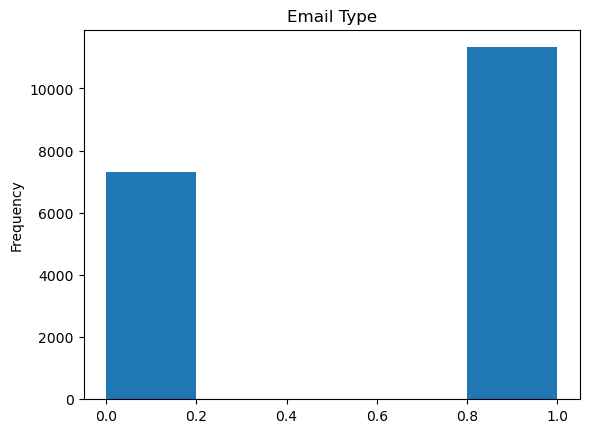

In [37]:
ax = df['Email Type'].plot(kind='hist', bins=5, title='Email Type') # Graph type, distance between the data and graph title as params

Now that the dataset is ready to analyze, we can discuss the learning models we'll put to use.

## Supervised Classification Models

We'll be using a total of **6** training models provided in the Scikit-learn module. These being:

**1.[Support Vector Classifier (SVC)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC):**
- A classification algorithm that finds the optimal boundary (or hyperplane) that separates data points of different classes. SVC is particularly effective in high-dimensional spaces and is versatile, allowing for the use of different kernel functions to handle various types of data distributions. It’s also efficient in terms of memory, as it only uses the most critical data points, known as support vectors, for decision making.

**2.[Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression):**
- A statistical method used for binary classification tasks, where the goal is to predict one of two possible outcomes. It models the probability that a given input belongs to a particular class by fitting a logistic function (also known as the sigmoid function) to the data. The output is a value between 0 and 1, which can be interpreted as a probability.
  
**3.[Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#multinomialnb):**
- Designed for classification tasks where features represent discrete counts, such as word frequencies in text classification. This variant of Naive Bayes assumes that the features follow a multinomial distribution, making it ideal for applications like document classification, where feature counts are integral to the model's effectiveness.

**4.[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier):**
- A model that predicts the value of a target variable by applying a series of decision rules based on feature values. The model constructs a tree where each node represents a decision based on a feature, and each leaf represents a predicted outcome. Decision trees are interpretable and capable of handling both categorical and numerical data, making them versatile for various classification tasks.
  
**5.[Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier):**
- An ensemble learning method that builds multiple decision trees on different subsets of the training data and averages their predictions to improve accuracy and prevent overfitting. This method enhances the robustness of predictions by reducing the variance associated with single decision trees, leading to more reliable classification results.

**6.[K-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier):**
- A classification technique based on instance-based learning, where the class of a data point is determined by the majority class among its nearest neighbors. KNN does not create an explicit model but instead stores all training data, making predictions by examining the closest examples. This method is simple, intuitive, and effective, especially when the decision boundary is irregular or complex.

## Initializing the Train and Test Variables

In [42]:
from sklearn.model_selection import train_test_split 

This module is used to **split** the dataset into a **training set**, which is used to train your machine learning model, and a **test set**, which is used to evaluate the model’s performance.

In [44]:
X = df['Email Text']
y = df['Email Type']

We can observe the contents of the **`X`** variable and that all null values have been taken care of once more.

In [46]:
X

0        re : 6 . 1100 , disc : uniformitarianism , re ...
1        the other side of * galicismos * * galicismo *...
2        re : equistar deal tickets are you still avail...
3        \nHello I am your hot lil horny toy.\n    I am...
4        software at incredibly low prices ( 86 % lower...
                               ...                        
18629    date a lonely housewife always wanted to date ...
18630    request submitted : access request for anita ....
18631    re : important - prc mtg hi dorn & john , as y...
18632    press clippings - letter on californian utilit...
18633                                                empty
Name: Email Text, Length: 18634, dtype: object

In [47]:
print(X.isna().sum())

0


There **aren't** any null values in the train variables as we've previosly ensured.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

The **_train_test_split_** method consists of these parameters:
- **`X`**: The feature matrix (input data).
- **`y`**: The target vector (output labels).
- **`test_size`**: Specifies the proportion of the dataset to include in the test split (e.g., 0.2 means 20% for testing and 80% for training).
- **`random_state`**: Controls the shuffling applied to the data before the split. Setting this ensures reproducibility of the split.
- **`X_train`**, **`X_test`**, **`y_train`, `y_test`**: The training and testing portions of the target vector.

## Vectorizing Email Text Data

**Vectorizing** test data with **`TfidfVectorizer`** involves transforming **text data** into **numerical features** that can be used by machine learning models. **TF-IDF**, which stands for **Term Frequency-Inverse Document Frequency**, is a numerical representation of text that reflects how important a word is in a document relative to a **collection of documents** (corpus). It consists of 2 main components of data, the **Term Frequency (TF)**, a measure of how **frequently** a term appears in **a document**, and the **Inverse Document Frequency (IDF)**, a measure of how important a term is by looking at its **occurrence** across **all documents** in the corpus.
The TF-IDF score is the product of these two metrics, giving a weighted value for each term in the context of the document and the corpus.

The **TfidfVectorizer** module from scikit-learn converts a collection of text documents into a matrix of TF-IDF features. The module is initially fitted on the training data for it to learn the **vocabulary** and calculate the **TF-IDF** values based on the training set. Next,the fitted vectorizer is used **transforms** the text in the test set into a numerical format based on the vocabulary and TF-IDF values learned from the training data. At the end, the result is a **matrix** where each **row** represents a **document** from the **test data**, and each **column** represents a **feature (word)** with its **TF-IDF score**. This matrix is the input employed for machine learning models.

In [287]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [289]:
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [400]:
X_train_vec = vectorizer.fit_transform(X_train)

In [401]:
X_test_vec = vectorizer.transform(X_test)

To see the the **dictionary** of all vectorized words, we can call **_vocabulary** attribute of the vectorizer, which refers to the **mapping** of terms (words) to their corresponding indices in the **feature matrix**.

In [58]:
vectorizer.vocabulary_

{'matthias': 88578,
 'saou': 118730,
 'wrote': 145447,
 'ok': 99297,
 'll': 84851,
 'add': 17490,
 'cool': 40244,
 'requiring': 114691,
 'file': 57687,
 'isn': 75608,
 'rpm': 117149,
 'possible': 107084,
 'maybe': 88719,
 'stopping': 127455,
 'build': 31319,
 'process': 108696,
 'errr': 53889,
 'ugly': 136829,
 'really': 112602,
 'think': 132698,
 'people': 103744,
 'installed': 73973,
 'kernel': 79378,
 'sources': 125126,
 'easiest': 50365,
 'install': 73969,
 'alsa': 19832,
 'drivers': 49236,
 'source': 125118,
 'yes': 146986,
 'driver': 49233,
 'requires': 114690,
 'don': 48333,
 'quite': 111324,
 'like': 84051,
 'nodeps': 96939,
 'tricky': 135225,
 'use': 138901,
 'feature': 56931,
 'rpmbuild': 117156,
 'need': 95375,
 'individual': 72959,
 'handling': 66382,
 'card': 33180,
 'considering': 39578,
 'sake': 118264,
 'tweaking': 136168,
 'real': 112544,
 'world': 145160,
 'create': 41414,
 'base': 26001,
 'files': 57704,
 'excluding': 55197,
 'suggest': 128520,
 'dependency': 45072,


We can also see what **vectorized data** looks like by printing one of the **`X`** variables.

In [60]:
print(X_train_vec)

  (0, 84600)	0.0332959114514678
  (0, 87064)	0.03607478436111239
  (0, 95668)	0.03208759764288189
  (0, 60135)	0.053480985270106925
  (0, 84618)	0.03932686340769781
  (0, 70039)	0.02211405135586872
  (0, 87050)	0.03502306073426425
  (0, 84562)	0.08214066662175278
  (0, 15654)	0.04321938076720858
  (0, 135156)	0.10810405302910275
  (0, 22793)	0.07544630059620201
  (0, 63787)	0.06033371578872532
  (0, 43578)	0.03443118873742321
  (0, 121343)	0.0725861560926832
  (0, 122859)	0.07544630059620201
  (0, 114682)	0.05116530894066634
  (0, 48118)	0.03517110706062026
  (0, 1770)	0.05806948739231811
  (0, 79379)	0.10810405302910275
  (0, 49658)	0.07933456595322305
  (0, 129074)	0.04081234485073404
  (0, 79464)	0.06830667389953848
  (0, 72574)	0.03858863877293397
  (0, 59222)	0.05904971279112155
  (0, 123241)	0.10810405302910275
  :	:
  (14905, 13169)	0.33996845108591506
  (14905, 63045)	0.23559282028460218
  (14905, 78877)	0.20321375978928846
  (14905, 42562)	0.2577611963149608
  (14905, 121338)	

We might as well print a **`y`** variable to observe the series of **encoded** email labels.

In [62]:
print(y_test)

8423     0
3183     1
17580    1
5433     1
774      0
        ..
928      1
939      1
13452    0
12254    0
1701     1
Name: Email Type, Length: 3727, dtype: int64


After much preparation, we can at last start training our first machine learning model, the **`Support Vector Classifier`**.

## Setting Up the Support Vector Classifier (SVC) Model

The support vector classifier model differs from many machine learning model, in the sense that, it has an additional step that needs to be followed, **under most but not all circumstances**, to produce a correct set of predictions, which is that it needs to be trained using a **scaled dataset**. 

**Binary classification problems**tend not to matter too much on if the training data was scaled or not. To see if this is the case or not for our dataset, we will implement both training methods of **directly fitting** the SVC model and **scaling the dataset first**.

In [66]:
from sklearn.svm import SVC

In [67]:
smv = SVC(gamma='auto', C=2, kernel='linear')

## Approach 1: Directly Fitting the Model

The **`fit()`** method is used to train or "fit" a machine learning model to the training data. It is the step where the model learns the relationships between the **input data** (features) and the **target labels** (outputs). The fitted model is displayed as seen down **below**.

In [70]:
smv.fit(X_train_vec, y_train)

SVC(C=2, gamma='auto', kernel='linear')

When it comes to what paramaters the model has, there are many to mention, but only the ones used in the code will be explained here.

**`C`:**
Controls the trade-off between maximizing the margin and minimizing classification errors. A smaller C creates a wider margin but allows for more misclassifications (more regularization). A larger C creates a narrower margin and tries to classify every training point correctly, which may lead to overfitting. It is set to 1.0 by default.

**`kernel`:**
Defines how the input data is transformed into a higher-dimensional space. Different kernels can be used depending on the nature of the data and the problem. The rbf kernel is often a good default choice, but if the data is linearly separable, the linear kernel might work better. It can be set to:
- **`linear`**: Linear kernel.
- **`poly`**: Polynomial kernel.
- **`rbf`**: Radial basis function kernel (a Gaussian kernel).
- **`sigmoid`**: Sigmoid kernel.
Custom kernel function (callable).


**`gamma`:**
Controls the influence of individual training examples. A small gamma means a large radius of influence for the support vectors, leading to a smoother decision boundary. A large gamma means a small radius of influence, which can lead to overfitting.
gamma='scale' is generally a good default. You can tune this parameter if your model is underfitting or overfitting. Its settings are:
- **`scale`**: Uses 1 / (n_features * X.var()) (default)
- **`auto`**: Uses 1 / n_features.
- A float value: Custom gamma value.

## Making Predictions Using the Model

The **`predict()`** method is uses the patterns it learned during the fit process to generate predictions for new input data **`X_test`**.

In [74]:
y_pred = smv.predict(X_test_vec)

In [75]:
y_pred

array([0, 1, 1, ..., 0, 0, 1])

## Analyzing Test Results

There are several metrics used to gauge the performance of a predictive model. Although **accuracy** will serve as the main point of comparison among the models, the other metrics will be touched on as well.

The **`accuracy_score()`** method calculates the proportion of correct predictions out of all predictions made.

In [79]:
from sklearn.metrics import accuracy_score
ys = accuracy_score(y_test, y_pred)
ys

0.9793399517037832

A **classification report** provides a detailed summary of the performance of a classification model. It includes several important metrics for evaluating the quality of predictions for each data label:

**1.Precision:**
- The ratio of correctly predicted positive observations to the total predicted positives.
  
**2.Recall:**
- The ratio of correctly predicted positive observations to all observations in the actual class. Also known as **'Sensitivity'** or **'True Positive Rate'**.

**3.F1-Score:**
- The weighted average of Precision and Recall, providing a single metric that balances both concerns.

**4.Support:**
- The number of actual occurrences of each class in the dataset.

What are also included in the report are the general values of:

**Accuracy:**
- The overall accuracy of the model.

**Macro Avg:**
  - The unweighted mean of the precision, recall, and F1-score across all classes.

**Weighted Avg:**
 - The weighted mean of the precision, recall, and F1-score, with weights corresponding to the number of instances in each class (i.e., the support).

It can be created usin the aptly named **`classification_report()`** method.

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1476
           1       0.99      0.97      0.98      2251

    accuracy                           0.98      3727
   macro avg       0.98      0.98      0.98      3727
weighted avg       0.98      0.98      0.98      3727



A **confusion matrix** is a performance evaluation tool used in classification tasks to visualize the accuracy of a model's predictions by comparing the actual class labels with the predicted class labels. It helps you understand how well your model is performing, particularly by showing how many instances of each class were correctly or incorrectly classified. The closer the predicted values are to a **main diagonal**, the better the performance of the model. The **`confusion_matrix()`** method in this case returns the confusion matrix as an **`array`**.

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
confusion_matrix(y_test, y_pred)

array([[1463,   13],
       [  64, 2187]])

A **heatmap** is a data visualization technique that uses color to represent values in a matrix. It is particularly useful for displaying the values of a matrix or table in a way that makes it easy to see patterns, correlations, and trends. But what we will put to use here is a **normalized heatmap**, which is a type of heatmap where the values in a matrix are adjusted to a **common scale**, making it easier to compare data across different ranges or categories. The **Seaborn** module provides a high-level interface for drawing attractive and informative statistical graphics, enabling plotting heatmaps.

Normalization ensures that the data values are transformed into a specific range, such as **0 to 1**, which allows for better visual comparison and interpretation.

Both types of heatmaps have their use in certain scenarios, but the normalized heatmap is what's been **preferred** here.

In [85]:
def normal_heat_plot(ytest, ypred):
    labels = unique_labels(y_test)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(ytest, ypred, normalize='true'), columns=column, index=indices)
    return sns.heatmap(table, annot=True, fmt='f', cmap='viridis')

<Axes: >

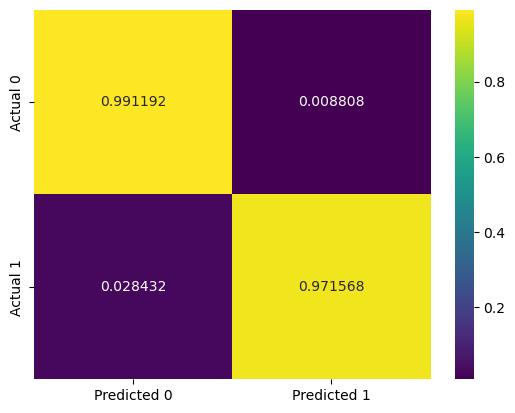

In [86]:
normal_heat_plot(y_test, y_pred)

## Second Approach: Fitting the Model with Scaled Data

**Scaling** refers to the process of adjusting the range or distribution of feature values so that they are on a similar scale. This is particularly important for models like SVC beacause of their sensitivity to the magnitude of feature values. Without scaling, features with larger ranges or different units can **dominate** the distance calculations, **skewing** the results. It also helps the model to train faster and work more efficiently. But, especially with **large datasets**, the swiftness of the training phase is **overshadowed** by the **intense** computational task of scaling, which takes significantly **longer**. 

There is variation in how you can scale the data and train the model with it. We can utilize a **`Pipeline`** to first standardize the dataset for training with the **`StandardScaler()`** method to then directly fit the SVC model with the readied dataset, or you can initialize the scaler to transform and fit the variables **separately**. Both ways have been put into action here.

One last thing to note is that the vectorized data we've acquired is stored as a **`sparse matrix`**, where **only non-zero elements** are retained to **save space**. However, for certain machine learning models, including those we are working with, this sparse format is not compatible. Therefore, we need to **convert** the **sparse** data into a **dense** format.

## Converting Sparse Data for Scaling

**Sparse matrices** provide efficient storage of **double or logical data** that has a large percentage of zeros. While **`dense (or full) matrices`** store every single element in memory regardless of value, sparse matrices store **only the nonzero elements** and their **row indices**.

Converting sparse data to dense data for training involves **transforming** a dataset where most of the elements are **zero (sparse)** into a format where all elements, including zeros, are **explicitly stored (dense)**. Some machine learning algorithms (like **scaled `SVC`** and **`Naive Bayes`** variants)require dense input, meaning they **cannot** handle sparse matrices **directly**. Also, while sparse representations are **memory-efficient**, certain operations or algorithms might perform **better** on dense data.

In [91]:
X_train_dense = X_train_vec.toarray()
X_test_dense = X_test_vec.toarray()

## Setting Up Alternate Variables for Scaled Dataset Training

Scaling large datasets can be **computationally intensive**, especially when dealing with a dataset with a **large sum of samples**. In such cases, the process can take hours or even longer to complete. To expedite the training process and reduce computation time, we'll instead scale a subset of the dataset, using only the first **5000** samples. This will allow us to observe the **basic structure** and **implementaion** of scaling in model training, but the calculated accuracy score will be **inevitably lower** than expected, due to the **smaller size** and **specialized state** of the training dataset.

In [317]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler

In [319]:
try_df = df.head(5000)

In [321]:
Xt = try_df['Email Text']
yt = try_df['Email Type']

In [323]:
Xt = Xt.fillna('')

In [325]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size = 0.2, random_state = 10)

In [327]:
Xt_train_vec = vectorizer.fit_transform(Xt_train)
Xt_test_vec = vectorizer.transform(Xt_test)

In [329]:
Xt_train_dense = Xt_train_vec.toarray()
Xt_test_dense = Xt_test_vec.toarray()

## Creating a Pipeline for Model Training

This is the first approach mentioned for scaled training with a **`Pipeline`**.

In [331]:
svd = make_pipeline(StandardScaler(), SVC(gamma='auto', C=2, kernel='linear')) # Create a pipeline with StandardScaler and SVC
svd.fit(Xt_train_dense, yt_train) # Fit the pipeline to the training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=2, gamma='auto', kernel='linear'))])

In [333]:
preddx = svd.predict(Xt_test_dense)
accuracy_score(yt_test, preddx)

0.908

As we've predicted, the model trained with **partial data** has produced a **sub-optimal** accuracy score.

In [335]:
print(classification_report(yt_test, preddx))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       413
           1       0.94      0.90      0.92       587

    accuracy                           0.91      1000
   macro avg       0.90      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



## Directly Scaling the Data

And this is the second approach where the scaling and training steps are done **separately**.

In [337]:
scaler = StandardScaler() 
Xt_train_scaled = scaler.fit_transform(Xt_train_dense)
Xt_test_scaled = scaler.transform(Xt_test_dense)
smodel = SVC(gamma='auto', C=2, kernel='linear')
smodel.fit(Xt_train_scaled, yt_train)

preddy = smodel.predict(Xt_test_scaled)
accuracy_score(yt_test, preddy)

0.908

We get the **same output** as the first approach, since it's just a different implementation of the same process.

## Logistic Regression Model

In [111]:
from sklearn.linear_model import LogisticRegression # Import the scikit-learn model.

Several parameters control the behavior and performance of the Logistic Regression model. Here’s a brief explanation of some key parameters:

**`penalty`:** Specifies the type of regularization to apply. **Regularization** helps prevent overfitting by penalizing large coefficients. **`l1`** performs Lasso regularization, **`l2`** (default) performs Ridge regularization, **`elasticnet`** is a combination of both, and **`none`** means no regularization.

**`C`:** A positive float value that controls the **trade-off** between achieving a low training error and a low testing error (regularization). Smaller values imply stronger regularization. It is 1.0 by default.

**`solver`:** Different optimization algorithms set for performance and convergence characteristics. **`liblinear`** is good for small datasets, **`sag`** and **`saga`** are efficient for large datasets, and **`lbfgs`** is a good default for most cases.`

**`max_iter`:** **Maximum** number of **iterations** for the solver to **converge** (**100** by default). Increase if the solver fails to converge (especially with complex models).

**`class_weight`:** Adjusts the importance of different classes, aka **weights**. The weights **aren't** adjusted bu default, but can also be said to a **`dictionary`** or **`balanced`**, which automatically adjusts weights inversely proportional to class frequencies.

**`random_state`:** Seed for the random number generator. It is important to set a value for this for reproducibility of results.

In [113]:
lgr = LogisticRegression(random_state=10)

In [114]:
lgr.fit(X_train_vec, y_train)

LogisticRegression(random_state=10)

In [115]:
y_predl = lgr.predict(X_test_vec)

In [116]:
print(classification_report(y_test, y_predl))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1476
           1       0.99      0.97      0.98      2251

    accuracy                           0.98      3727
   macro avg       0.97      0.98      0.98      3727
weighted avg       0.98      0.98      0.98      3727



In [117]:
yl = accuracy_score(y_test, y_predl)
yl

0.9761202039173598

<Axes: >

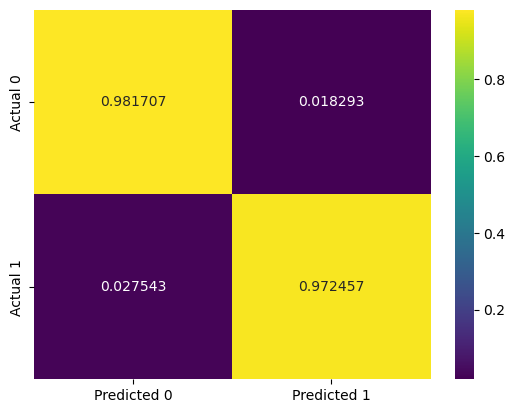

In [118]:
normal_heat_plot(y_test, y_predl)

## Multinomial Naive Bayes Model

Naive Bayes models, as previously mentioned, require **dense data** to be trained, so the **converted variables** from the first model wil be put to use here.

In [121]:
from sklearn.naive_bayes import MultinomialNB # Import the scikit-learn model.

In [122]:
mnb = MultinomialNB() # Initialize the model.

In [123]:
mnb.fit(X_train_dense, y_train)

MultinomialNB()

In [124]:
y_predm = mnb.predict(X_test_dense)

In [125]:
print(classification_report(y_test, y_predm))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1476
           1       0.88      1.00      0.94      2251

    accuracy                           0.92      3727
   macro avg       0.94      0.90      0.91      3727
weighted avg       0.93      0.92      0.92      3727



In [126]:
ym = accuracy_score(y_test, y_predm)
ym

0.9200429299704856

<Axes: >

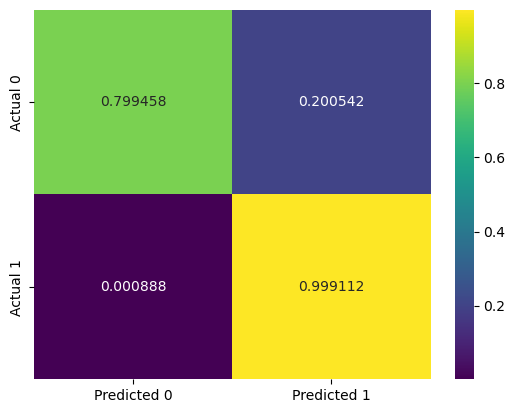

In [127]:
normal_heat_plot(y_test, y_predm)

## Decision Tree Classifier Model

In [129]:
from sklearn.tree import DecisionTreeClassifier

The key detail in training the decision tree classifier is to set the **`random_state`** parameter to a fixed integer value, so that the model's accuracy scores will be reproducible across separate runs of the code.

In [131]:
dtc = DecisionTreeClassifier(random_state=10)

In [132]:
dtc = dtc.fit(X_train_vec, y_train)

In [133]:
y_predt = dtc.predict(X_test_vec)

In [134]:
print(classification_report(y_test, y_predt))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1476
           1       0.95      0.93      0.94      2251

    accuracy                           0.93      3727
   macro avg       0.93      0.93      0.93      3727
weighted avg       0.93      0.93      0.93      3727



In [135]:
yc = accuracy_score(y_test, y_predt)
yc

0.9302387979608264

<Axes: >

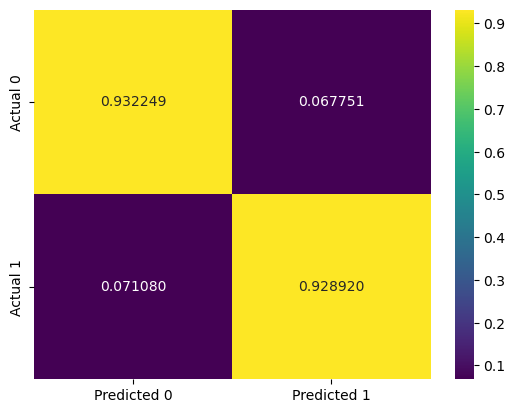

In [136]:
normal_heat_plot(y_test, y_predt)

## Random Forest Classifier Model

In [138]:
from sklearn.ensemble import RandomForestClassifier

The random forest classifier model has many parameters that have various effects on the performance, but only the ones appearing in the code cell above will be mentioned here, as the rest of them will stay at a default setting when not specified:

- **`n_estimators`:**
The number of trees in the forest. It is set to **100** by default. Increasing the number of trees usually improves the performance (reduces variance) but also increases the computation time. After a certain point, additional trees might not improve the model significantly.

- **`criterion`:**
The function to measure the quality of a split. The default setting **'gini'** but can also be **'entropy'**. Gini and entropy are both measures of impurity, but they are calculated differently. Typically, both give similar results.

- **`max_depth`:**
The **maximum depth** of each tree in the forest. Limits the number of levels in each tree. A shallow depth might **underfit**, while a very deep tree might **overfit**. By default, nodes are expanded until all leaves are pure or contain fewer than min_samples_split samples (so **None**).

- **`min_samples_split`:**
The minimum number of samples required to split an internal node. Controls the **minimum number** of samples a node must have before it can be split. It is set to **2** by default. Higher values prevent the model from learning overly specific patterns (reduces overfitting).

- **`random_state`:**
Controls the randomness of the **bootstrapping** of the samples and the random selection of features. It is disabled by default but if set, it ensures **reproducibility** of the results. It is useful for comparing results across different runs.

In [140]:
rdf = RandomForestClassifier(n_estimators=200, criterion ="gini", max_depth=8, min_samples_split=10, random_state=5)

In [141]:
rdf.fit(X_train_vec, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, n_estimators=200,
                       random_state=5)

In [142]:
y_predf = rdf.predict(X_test_vec)

In [143]:
print(classification_report(y_test, y_predf))

              precision    recall  f1-score   support

           0       1.00      0.19      0.32      1476
           1       0.65      1.00      0.79      2251

    accuracy                           0.68      3727
   macro avg       0.83      0.60      0.56      3727
weighted avg       0.79      0.68      0.60      3727



In [144]:
yf = accuracy_score(y_test, y_predf)
yf

0.6796350952508721

<Axes: >

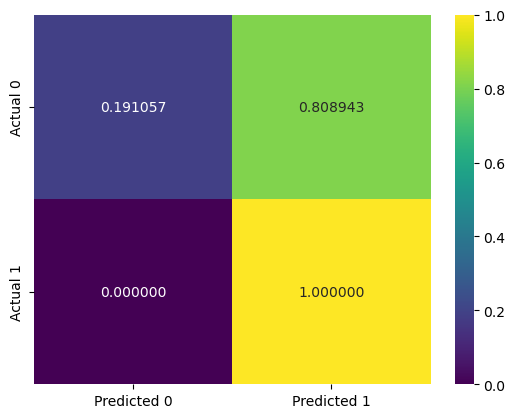

In [145]:
normal_heat_plot(y_test, y_predf)

## K-Nearest Neighbors Model

In [147]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
knn = KNeighborsClassifier(n_neighbors=5)

In [149]:
knn.fit(X_train_vec, y_train)

KNeighborsClassifier()

The **`n_neighbors`** parameter determines **how many** of the closest training data points (neighbors) are considered when making a prediction for a new data point. The algorithm counts how many neighbors belong to each class, and the class with the most votes is assigned to the new data point. The default value is **5**.

In [151]:
y_predk = knn.predict(X_test_vec)

In [152]:
print(classification_report(y_test, y_predk))

              precision    recall  f1-score   support

           0       0.51      0.85      0.64      1476
           1       0.82      0.46      0.59      2251

    accuracy                           0.62      3727
   macro avg       0.67      0.66      0.61      3727
weighted avg       0.70      0.62      0.61      3727



In [153]:
yk = accuracy_score(y_test, y_predk)
yk

0.6155084518379393

<Axes: >

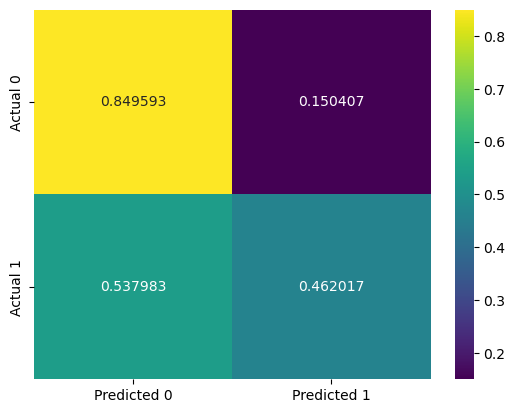

In [154]:
normal_heat_plot(y_test, y_predk)

## Putting All Accuracy Scores in a DataFrame

We can finally combine the data we gathered and draw a conclusion as to which predictive machine learning model is the most suitable for **phishing mail detection**. We'll utilize a dataframe to store and display our findings in a clear and legible way.

To achieve this, we'll first set up a **`dictionary`** containing the names of the training models as **`keys`** and the models themselves as **`values`**.

In [157]:
models = {
    'Logistic Regression': yl,
    'Multinomial Naive Bayes': ym,
    'Decision Tree': yc,
    'Random Forest': yf,
    'Support Vector Machine': ys,
    'K-Nearest Neighbors': yk,
}

Then, we'll create a list that is initially empty, and fill it up using a **`for`** loop that will iterate through the models and **append** the accuracy scores in the list based on the corresponding name. So basically **compile** what we've gone through.

In [159]:
# Initialize an empty list to store rows
data = []

# For loop to populate the list
for model_name, score in models.items():
    data.append({'Model': model_name, 'Accuracy': score})

At last, we'll convert the **results** dictionary into a **`DataFrame`**, sort the accuracy values from highest to lowest and reset the indexes.

In [161]:
# Create DataFrame from the list
results_df = pd.DataFrame(data)
results_df.sort_values(by='Accuracy', ascending=False, inplace=True) # Sort the accuracy scores in descending order.
results_df.reset_index(drop=True, inplace=True) # So the indexes are in ascending order. (0, 1, 2, ...)
results_df

,Model,Accuracy
0,Support Vector Machine,0.979340
1,Logistic Regression,0.976120
2,Decision Tree,0.930239
3,Multinomial Naive Bayes,0.920043
4,Random Forest,0.679635
5,K-Nearest Neighbors,0.615508


By looking at the sorted list of accuracy scores, we can determine that the **`Support Vector Classifier`** has performed the best with an accuracy of **97.93%**, indicating it is the best performing model among the ones tested. **`Logistic Regression`** has also appeared as a strong candidate for this task, coming in a close second place at **97.61%**, which makes it the more desirable choice for certain scenarios, where **swift processing** of data is a bigger priority. Howeveri we will pick the **`SVC`** as our model for the remaining steps of the project, **cross-validation** and **demo testing**.

## Cross-Validation of the Dataset

After all we've done, **what** the most efficient model to use for **phishing mail detection** is, has more or less become clear, but we aren't just done, because we still don't know for certain **how** optimal this model's accuracy is. This is because we've only gone through regular validation of model predictions, with a dataset that's split and then kept constant for all future use. This is not an ideal situation, especially for real-life applications, as it can cause the model to in a way memorize the dataset and assess new data with an unwanted bias. To prevent this, **cross-validation** of the dataset is put to use.

Cross-validation is a more robust technique for assessing model performance by partitioning the data into multiple subsets or "folds" and iteratively training and validating the model. One of the most commonly used cross-validation methods is **`K-Fold Cross Validation`**, where the dataset is split into **`k`** equally sized folds. The model is then trained **`k`** times, each time using **`k-1`** folds for training and the remaining fold for validation. Finally, the performance metrics are averaged over the **`k`** folds.

The methods we'll be using, **`cross-val-score()`** and **`cross-val-predict()`**, were built based on this approach, and they will help us determine the **'actual'** accuracy score of the model. Since the real accuracy values are almost always less than the idealized validation estimates, it'll be enough for us to test the performance of the most accurate model, the **`Random Forest Classifier`**, to see if there's a discrepancy in the dataset that substantially threw off the model or not.

These discrepancies come in the form of the **overfitting** or **underfitting** of the model. **Overfitting** occurs when a model learns the training data **too well**, including its noise and outliers, to the point that it performs poorly on new, unseen data. **Underfitting** occurs when a model is **too simple** to capture the underlying patterns in the data, resulting in poor performance on both the training and test data.

In [165]:
from sklearn.model_selection import cross_val_score

In [166]:
pi = accuracy_score(y_test, y_pred)
pi

0.9793399517037832

This is the accuracy score we found using **single-validation**. We'll compare it with the **cross-validated** result very soon.

In [168]:
from sklearn.model_selection import cross_val_predict

The **`cross_val_predict()`** method works quite similary with the **`predict()`** method, with the main difference being that it takes both test variables to iteratively create and use the folds for training.

In [170]:
pred = cross_val_predict(smv, X_test_vec, y_test)
pred

array([0, 1, 1, ..., 0, 0, 1])

Unlike single-validation, there are **two** different ways we can calculate the accuracy scores in this instance. They are both **valid** metrics to consider and will allow to set a **range** of values that the accuracy lies on. Plus they won't be too far off from one another.

In [172]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1476
           1       0.99      0.96      0.97      2251

    accuracy                           0.97      3727
   macro avg       0.97      0.97      0.97      3727
weighted avg       0.97      0.97      0.97      3727



In [173]:
pr = accuracy_score(y_test, pred)
pr

0.9699490206600483

This is the value we got from the model predictions being collected over **all folds** and compared to the true labels at the end, which returns a **single** accuracy score.

In [175]:
scores_n = cross_val_score(smv, X_test_vec, y_test, cv=10, scoring="accuracy")
scores_n

array([0.98391421, 0.97587131, 0.96514745, 0.97050938, 0.98123324,
       0.96514745, 0.96782842, 0.95698925, 0.97580645, 0.96774194])

The **`cross_val_score()`** method though,  computes the accuracy independently for each fold, and then averages them. Each fold has performed slightly differently due to variations in the training data (since each training set in a fold is slightly different). We'll get the **mean** of thes values to get our **alternate** accuracy value.

In [177]:
po = np.mean(scores_n)
print(po)

0.9710189108939435


In [178]:
print("Difference: {:.4}".format(pi - po)) # Biggest difference between the ideal and real accuracy scores.

Difference: 0.008321


Due to the difference of execution pertaining to the methods, we have in fact acquired different but really close accuracy scores, which we can assertively claim as the **real** accuracy score of the model, which means that there's neither an overfitting nor underfitting situation present in the model, as there's a net difference of around **0.8%** in our **single-validated** and **cross-validated** accuracy scores.

To conclude the project, we will run a simple **DEMO** program that using a uses the trained SVC model to classify an email as either phishing or safe.

## Email Classification **DEMO**

All the work we've put into finding and training the most suitable model will become meaningful only if we can harness it to categorize real life examples. A basic way to implement the model has been implemented here. The program prompts the user to **input** an email, which is captured as a **string**. The entered email is then transformed into a numerical format using the **vectorizer**. After that, the transformed email is passed to the **trained machine learning model** (SVC in this case) to predict its class. Based on the model’s prediction, if the result is mapped out to be **0**, the email is classified as phishing, otherwise, the email is classified as safe.

In [404]:
try:
    label_mapping = {       # Example dictionary to map label encoded categories to their string representations
    0: "Phishing Mail",     # The initial dictionary created for mapping the labels can be called here as well
    1: "Safe Mail"
    }
    user_input = input("Enter your e-mail: ") # Get user input
    input_vectorized = vectorizer.transform([user_input]) # Vectorize the user input
    result = smv.predict(input_vectorized) # Predict the category
    predicted_label = label_mapping[result[0]] # Convert the numerical result to the corresponding label
    if predicted_label == "Phishing Mail": # Check if the predicted label is "Phishing Mail"
        print("This is phishing mail.")
    else:
        print("This is safe mail.")
except Exception as e:
    print(f"An error occurred: {e}")

Enter your e-mail:  ayup


This is phishing mail.


You can input any example text (that is ideally from **actual emails**) to validate the performance of the trained model **yourself**.

## Conclusion

Based on the training and testing we've done, the supervised machine learning model for this particular dataset is the **`Support Vector Classifier`** model, although **`Logistic Regression`** is also a solid pick for fast and efficient computation. Using regular validation, we got an ideal accuracy score of almost **98%**, and in our cross-validation, we observed that there was not an overfitting or underfitting issue at all regarding our training dataset as we got the more realisitic accuracy score range to be around **0.8-1%**, which shows that the model has actually learned, and not just memorized,information regarding the dataset. Meaning that for future predictive analysis of the dataset, this is the model that will be put to use.

## References

- https://www.ibm.com/topics/machine-learning

- https://www.ibm.com/topics/supervised-learning

- https://www.mathworks.com/help/matlab/sparse-matrices.html

- https://scikit-learn.org

- Subhadeep Chakraborty. (2023). Phishing Email Detection [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/6090437